In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings

# notebook settings
plt.style.use('classic')
pd.set_option('display.max_columns', 10)
plt.rc('figure', max_open_warning = 40)
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_excel('../data/marketing_campaign.xlsx')

In [3]:
data.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,...,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,...,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,...,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,...,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,...,0,0,3,11,0


# Easy (+0.1)

In [4]:
answer = data['Complain'].sum()
print(f"The number of people who have complained at least once during the last 2 years is {answer}")

The number of people who have complained at least once during the last 2 years is 21


<div class="alert alert-block alert-success">
<b>ANSWER:</b> 21
</div>

In [5]:
features_indicating_a_purchase = ["MntFishProducts", "MntMeatProducts", 
                                  "MntFruits", "MntSweetProducts",
                                  "MntWines", "MntGoldProds"]

In [6]:
# .gt(0) checks if each value in the specified columns is greater than 0. 
# .any(axis=1) checks if at least one of these conditions is true for each row

customers = data[data[features_indicating_a_purchase].gt(0).any(axis=1)]

In [7]:
current_year = datetime.now().year
customer_mean_age = round(np.mean(current_year - customers['Year_Birth']))
customer_mean_age

55

<div class="alert alert-block alert-success">
<b>ANSWER:</b> 55
</div>

We can observe that all individuals in this dataset are customers. <br>
Therefore, the mean age for all individuals in this dataset is the same as that for customers only.

In [8]:
print(f"number of customers = {customers.shape[0]}\nnumber of rows = {data.shape[0]}")

number of customers = 2240
number of rows = 2240


<div class="alert alert-block alert-success">
<b>ANSWER:</b> NO
</div>

# Medium (+0.4)

- Education
- Marital_Status
- Income
- Kidhome
- Teenhome
- Recency
- NumWebPurchases
- NumStorePurchases
- возраст

In [9]:
data['Age'] = current_year - data["Year_Birth"]

Some features aren't numerical. First, we need to fix this.

In [10]:
encoder = LabelEncoder()
data['Education_numerical'] = encoder.fit_transform(data['Education']) + 1
data['Marital_Status_numerical'] = encoder.fit_transform(data['Marital_Status']) + 1


In [11]:
features = [
        "Education_numerical",
        "Marital_Status_numerical",
        "Income",
        "Kidhome",
        "Teenhome",
        "Recency",
        "NumWebPurchases",
        "NumStorePurchases",
        "Age"
        ]

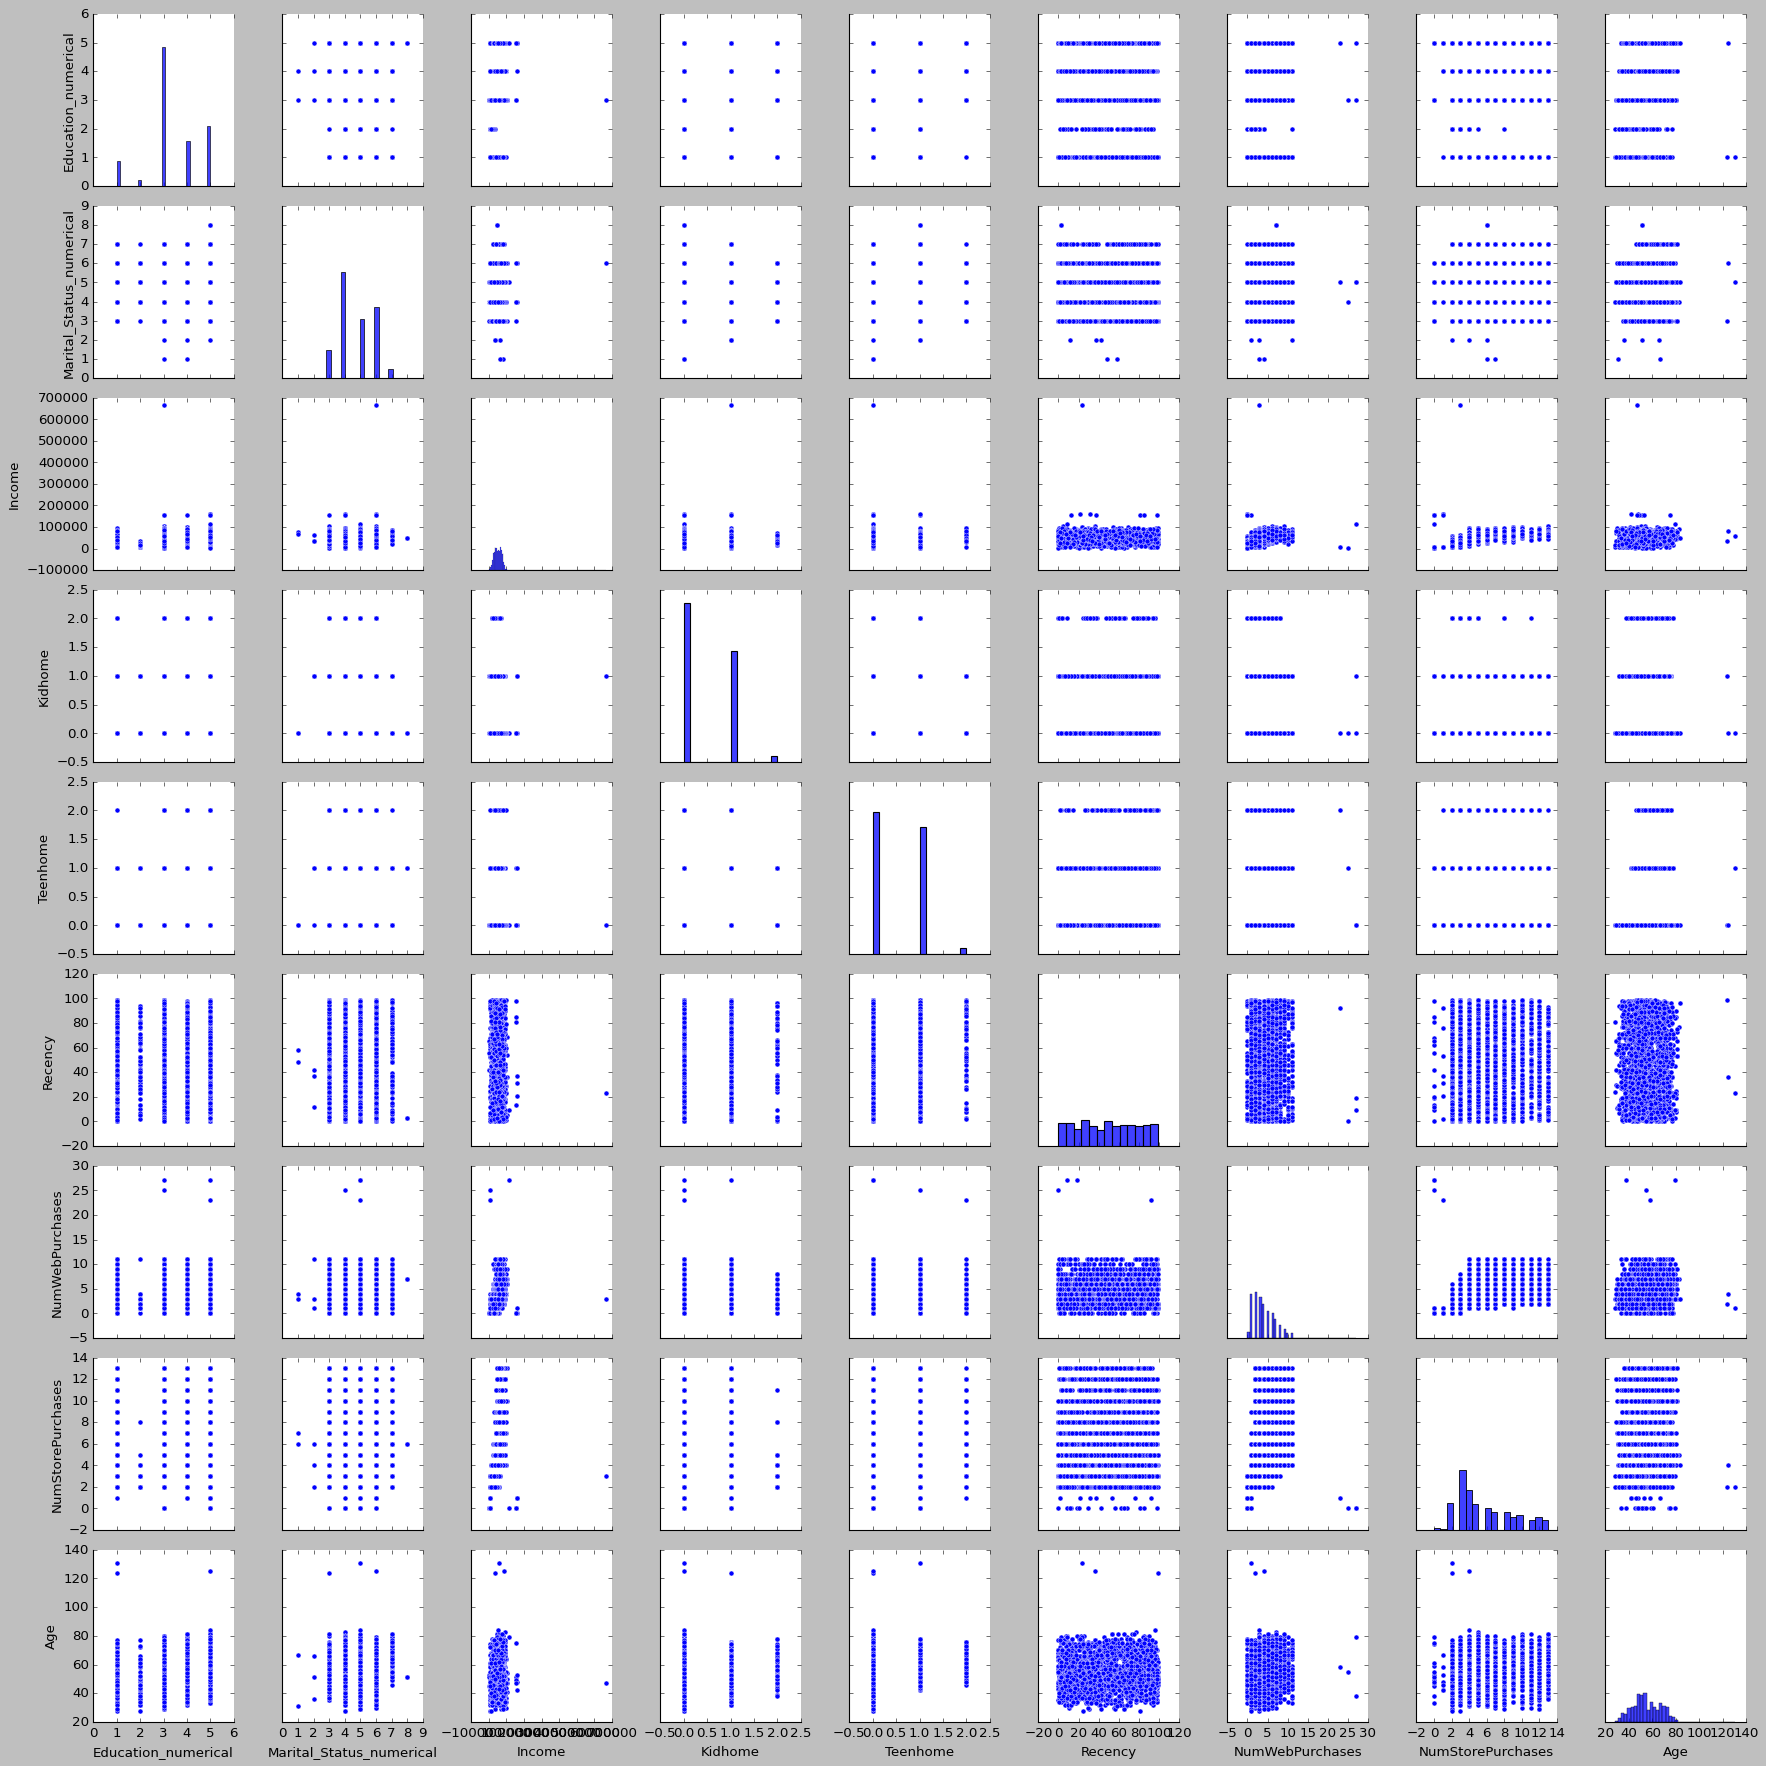

In [12]:
sns.pairplot(data[features])

## Conclusion:

1. There is almost no correlation between the chosen features.

2. The only dependencies I can see visually are:

- `Martial_Status` / `Kidhome`
- `Income` / `NumWebPurchases`
- `Income` / `NumStorePurchases`

# Hard (+0)

The target audience is a group of people who will potentially buy the company's products,<br>
at least with a greater probability than a randomly chosen person.

<b>1.</b> We have data regarding the results of the last 6 campaigns. Let's evaluate the summary.

In [13]:
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

In [14]:
customers['Accepted_Campaigns_Total'] = customers[campaigns].sum(axis=1)

<Axes: >

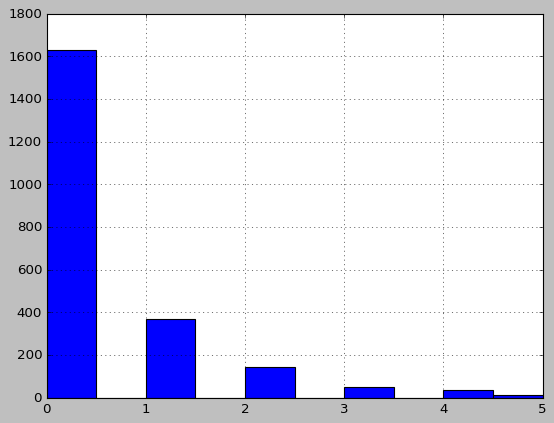

In [15]:
customers['Accepted_Campaigns_Total'].hist()

In [16]:
customers[customers["Accepted_Campaigns_Total"] >= 2].shape[0]

239

We can create a target audience of people who accepted at least 2 offers during the last 6 campaigns.<br>
If we need to choose more customers, then refer to step 2.

<b>2. The target audience depends on the type of product we want to advertise. </b>

- If it's something for children, then we should focus on `Marital_Status` and `Kidhome` 
   in the first place.

- For expensive commodities, it's reasonable to take into account the user's income (which should be substantial).

<b>Overall,</b> we can focus on how much each customer has spent in our shop.
<br> The more he spends, the more likely he will spend even more.


`not_loyal_customers` = customers who accepted < 2 campaigns 

In [17]:
not_loyal_customers = customers[customers['Accepted_Campaigns_Total'] < 2]

In [18]:
not_loyal_customers['total_spendings'] = not_loyal_customers[features_indicating_a_purchase].sum(axis=1)

<Axes: >

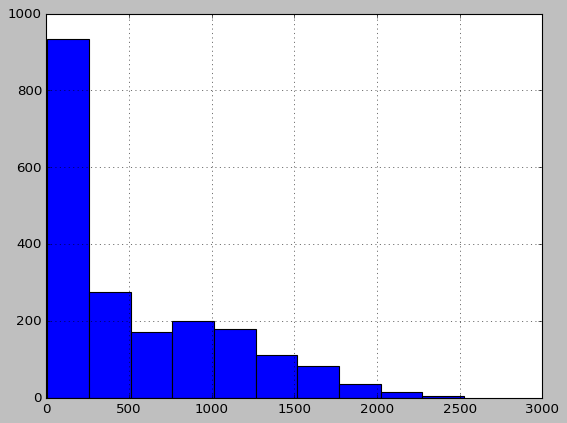

In [19]:
not_loyal_customers["total_spendings"].hist(bins=10)

In [20]:
not_loyal_customers[not_loyal_customers["total_spendings"] >= 1000].shape[0]

437

We have <b>437</b> *not loyal* customers, who have spent more than <b>1000$</b>

Total target audience could consist of: <b>239 + 437 = 676</b> customers

## Final answer:

In [21]:
target_audience_1 = \
    customers[customers["Accepted_Campaigns_Total"] >= 2]['ID']\
    .reset_index(drop=True)

In [22]:
target_audience_2 = not_loyal_customers[not_loyal_customers["total_spendings"] >= 1000]['ID']\
    .reset_index(drop=True)

In [23]:
target_audience = pd.concat([target_audience_1, target_audience_2], ignore_index=True)

In [24]:
pd.DataFrame(target_audience)

,ID
0,2114
1,2968
2,2225
3,6260
4,6853
...,...
671,9589
672,8720
673,9817
674,10870
